# Loan Prediction Dataset

Table of Contents:

0. Problem Statement
1. Data Analysis
    - Data Description
    - Data Loading and Cleanup
    - Exploratory Data Analysis (EDA)
        - Distribution Plots
            - Outlier Removal
            - Skew-Normalization
        - Box Plots
        - Count Plots
        - Correlation Heatmap
        - ANOVA Statistical Test
2. Machine Learning Models
    - Data Preprocessing
    - Model Selection
    - Model Evaluation
        - Hyperparameter Tuning
        - Test Set Evaluation
3. Conclusions
    - Feature Importance
    - Final words

## Problem Statement

**Problem:** This year, a bank is seeking to issue new loans to their customers. However, the number of applicants is such that it has become practically impossible to examine all loan applications individiually and on time. 

**Objective:** Given past loan approval data, help automatize the loan approval process so that the bank team does not get overwhelmed.

**Solution:** Build a Machine Learning Classification Model that will be trained on past, manually conducted loan approval data and be able to estimate the probability of an applicant being a suitable borrower of the bank's funds.

## 1. Data Analysis

### Data Description

*Dataset: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset*

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

The dataset includes 4269 rows and 13 columns:
- `loan_id` (number)
- `no_of_dependents` (number of dependets of the applicant; number)
- `education` (education of the applicant; Graduate/Non Graduate)
- `self_employed` (yes/no)
- `income_annum` (annual income of applicant; number)
- `loan_amount` (number)
- `loan_term` (years)
- `cibil_score` (CIBIL credit score; number from 300 to 900)
- `residential_assets_value` (number)
- `commercial_assets_value` (number)
- `luxury_assets_value` (number)
- `bank_asset_value` (number)
- `loan_status` (Approved/Rejected)

### Data Loading and Cleanup

In [289]:
#Importing libraries
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from scipy.stats import skew, f_oneway, ttest_1samp, skew, kurtosis
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, ShuffleSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
#Loading Data
df = pd.read_csv('loan_approval_dataset.csv')

In [5]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
#Setting index
df = df.set_index('loan_id')

In [7]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

Every column name has a blank space before it. Let's clean that up.

In [8]:
#Removing whitespaces from column names
def rename_dataframe(df):
    for col in df.columns:
        df.rename(columns={ f'{col}' : f'{col.strip(' ')}'}, inplace=True)
    return df

In [9]:
df = rename_dataframe(df)
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [10]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected


Not only are the column names infected with the 'leading whitespace', but so is every single string object inside of the dataset. This also requires cleaning.

In [11]:
#Automatically detecting which columns are of the string type by going through the first row
def declare_cat_num_cols(df):
    categorical_cols = []
    numerical_cols = []
    for i, col in enumerate(df.columns):
        if is_numeric_dtype(df.iloc[0,i])==False:
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)
    return categorical_cols, numerical_cols

In [12]:
categorical_cols, numerical_cols = declare_cat_num_cols(df)

In [13]:
#Removing leading whitespaces from categorical data
def remove_leading_whitespaces(df, categorical_cols):
    for i, col in enumerate(df[categorical_cols].columns):
        df[col] = df[col].apply(lambda string: string.strip())
    return df

In [14]:
df = remove_leading_whitespaces(df, categorical_cols)

Checking if the column names are now fixed:

In [15]:
df.iloc[0,1]

'Graduate'

In [16]:
df.iloc[0,2]

'No'

In [17]:
df.iloc[0,-1]

'Approved'

Success!

In [18]:
#Checking for null-values
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [19]:
#Checking for duplicates
df.duplicated().sum()

0

In [20]:
#Checking y-target balance of our dataset
print(f'Number of approved loans: {df[df['loan_status']=='Approved'].value_counts().sum()}')
print(f'Number of rejected loans: {df[df['loan_status']=='Rejected'].value_counts().sum()}')

Number of approved loans: 2656
Number of rejected loans: 1613


We see that there are around 1.5x more positive target values than there is negative ones. This will be taken into account when training our model.

In [21]:
#Descriptive Statistics to spot any errors in data
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


The above table shows that the minimum `residential_assets_value` is a negative number. At first sight, this might seem like an error. However, the value of a residential asset can indeed be negative if the current value of the property is lower than the mortgage value. Just in case, let us plot the negative `residential_assets_value` column values.

<Axes: xlabel='loan_id', ylabel='residential_assets_value'>

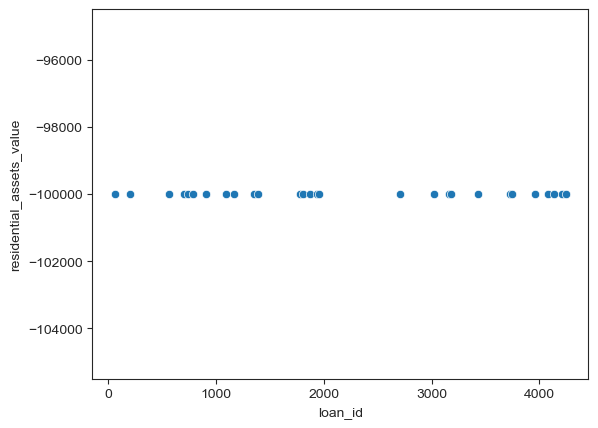

In [22]:
sns.scatterplot(data=df[df['residential_assets_value']<0], x=df[df['residential_assets_value']<0].index, y=df[df['residential_assets_value']<0]['residential_assets_value'])

In [23]:
#Number of negative residential asset values
df[df['residential_assets_value']<0].value_counts().sum()

28

Even though this value could theoretically be negative, because of the odd uniformity of negative value in this category, we will assume that these 28 data points are indeed erronous and will remove them.

In [24]:
len(df)

4269

In [25]:
df = df.query('residential_assets_value >= 0')

In [26]:
len(df)

4241

### Exploratory Data Analysis

### Distribution Plots

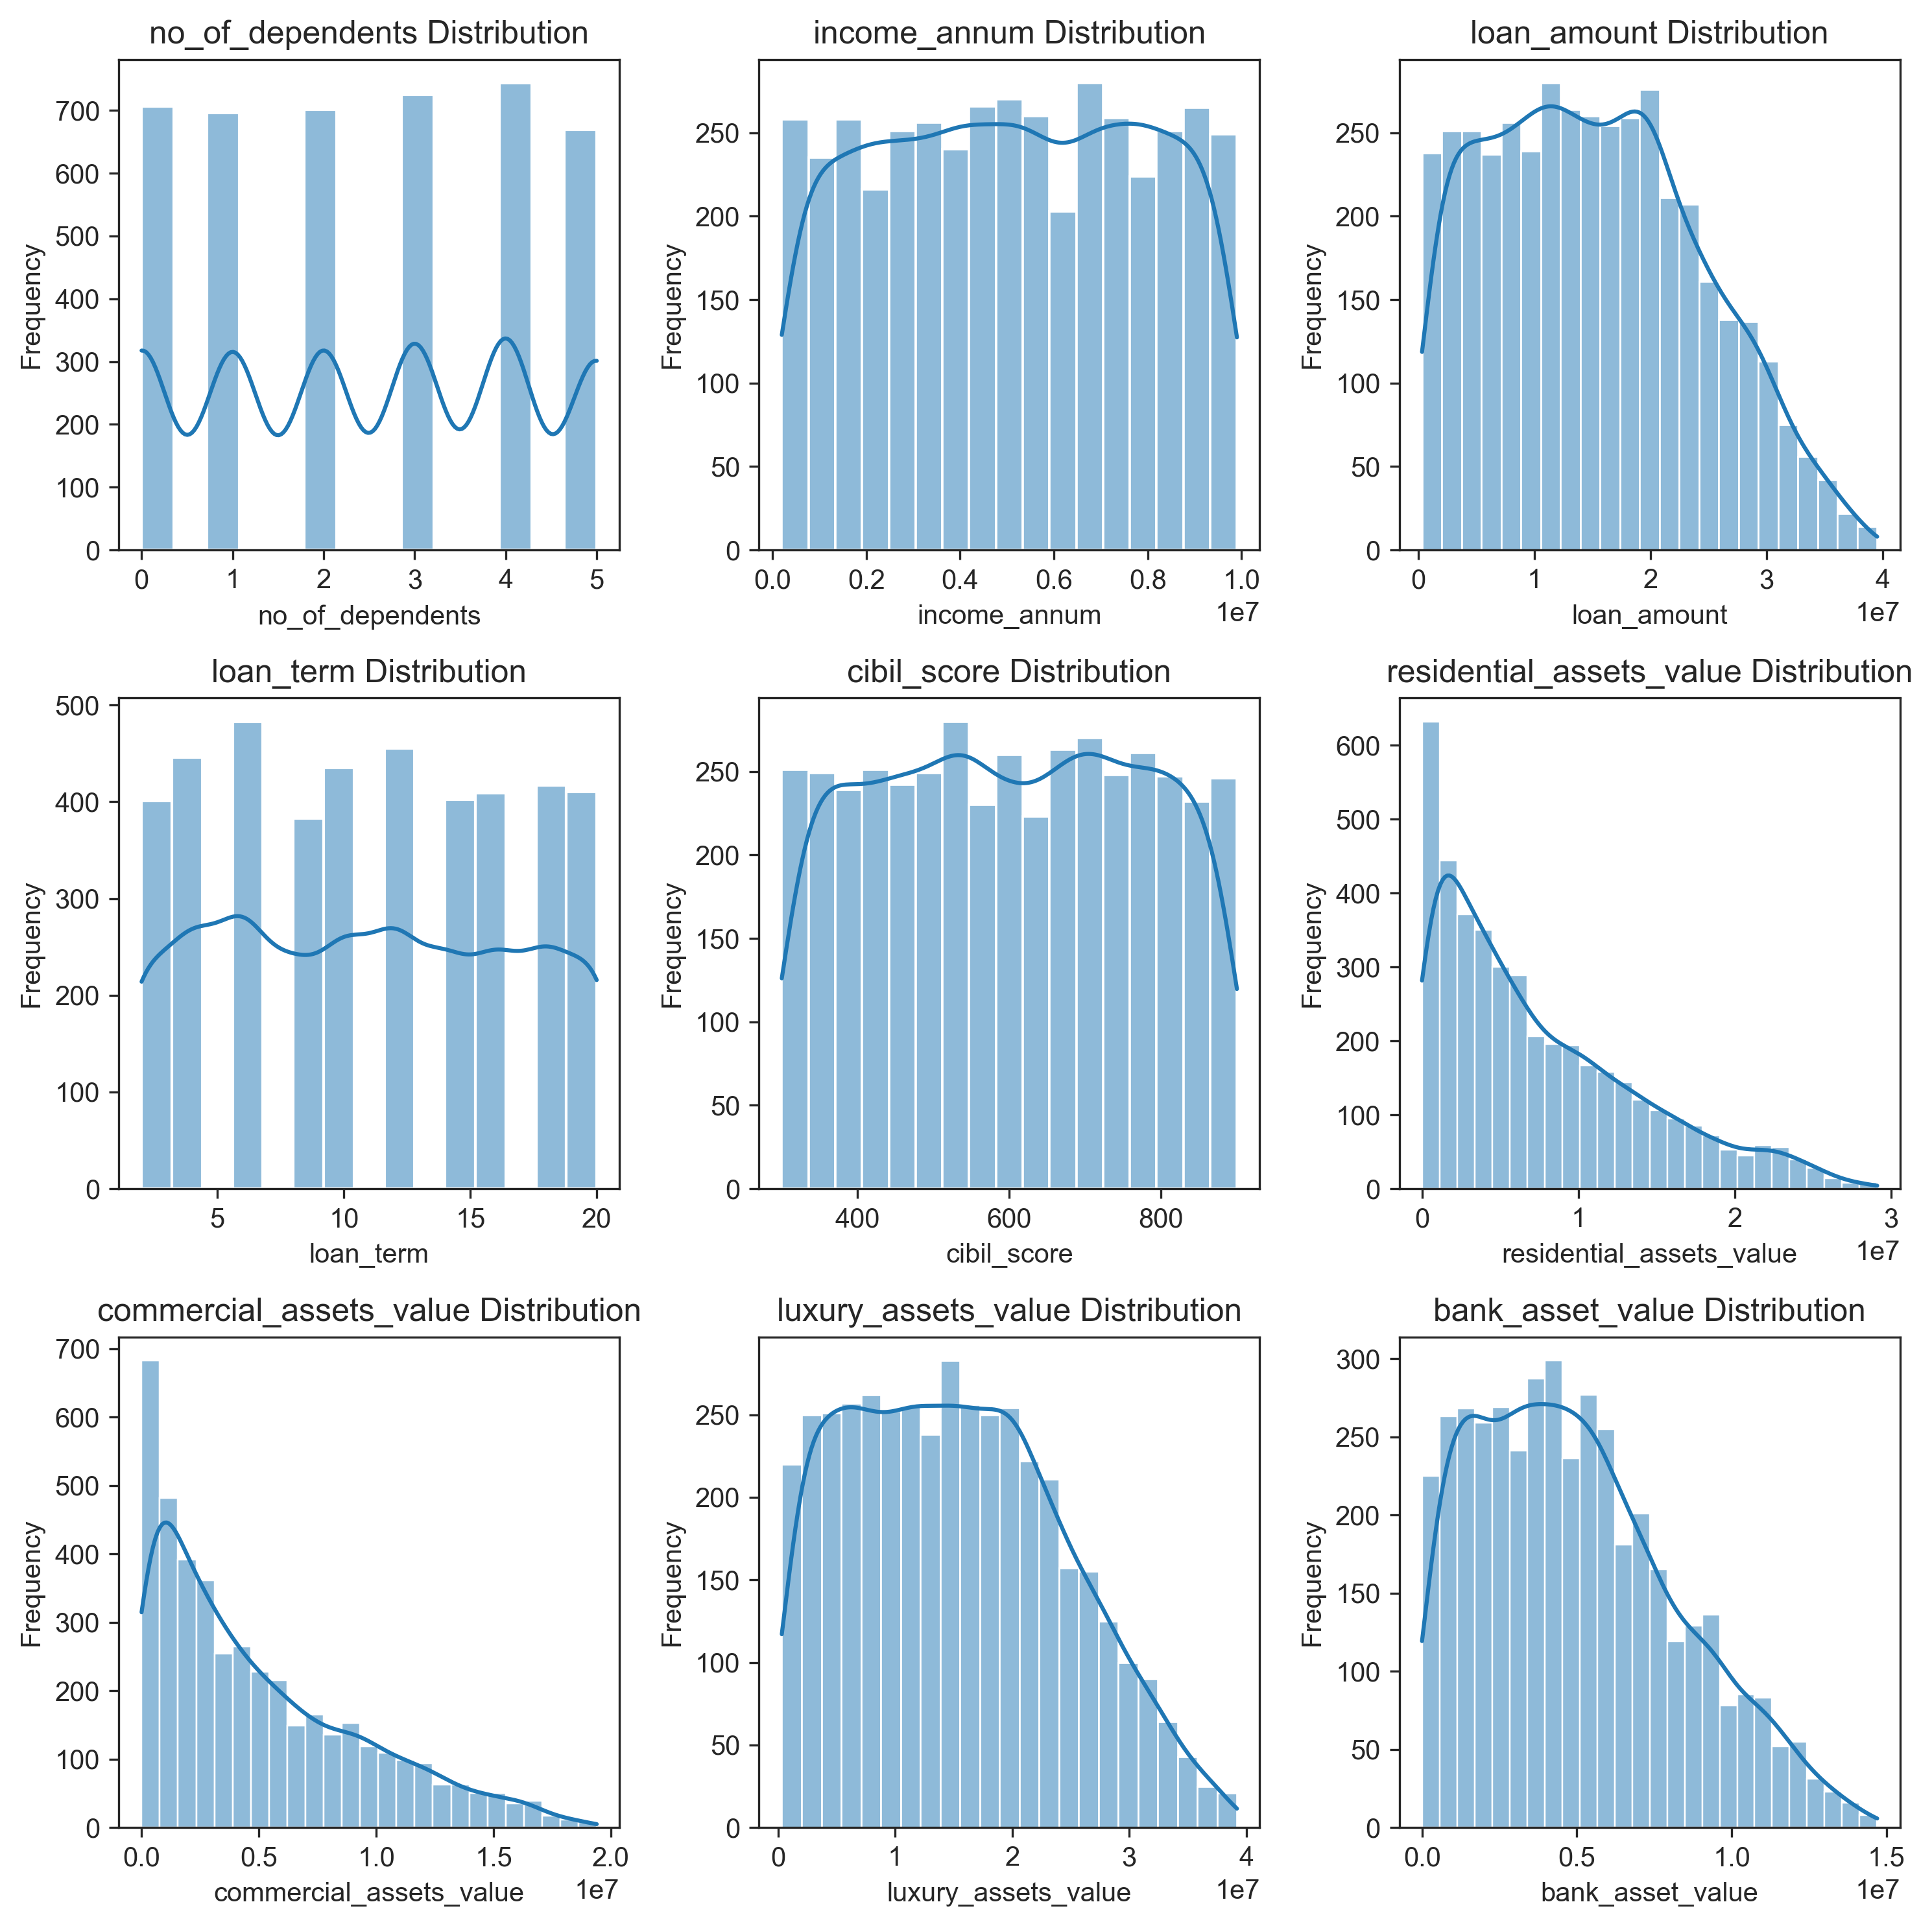

In [27]:
#Distribution plots for numerical features
fig= plt.figure(figsize=(10,10), dpi=300)
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3, i+1) #i+1 is the index of the subplot, from L to R, Up to Down
    sns.histplot(df[col], kde=True)
    plt.ylabel("Frequency")
    plt.title(f'{col} Distribution')

plt.savefig('images/01_Distributions.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

We can see that the distribution plots for many of the features are very skewed. Features that are not normally distributed tend to degrade the performance of many Machine Learning models. The data, namely columns `loan_amount`, `residential_assets_valueb` ,`commercial_assets_value`, `luxury_assets_value` and `bank_asset_value` need skew-normalizing. Before that, we will begin by removing outliers from our data using a z-score outlier removal method.

#### Outlier removal

In [28]:
#Removing all outliers outside the 3 standard deviation range
def remove_outliers_3_std(df, numerical_columns):
    for i, col in enumerate(df[numerical_columns].columns):
        lower_lim = df[col].mean() - 3 * df[col].std()
        upper_lim = df[col].mean() + 3 * df[col].std()
        df = df[(df[col] >= lower_lim) & (df[col] <= upper_lim)]
    return df

In [29]:
#Checking number of removed outliers
df_no_outliers = remove_outliers_3_std(df, numerical_cols)
df.shape[0] - df_no_outliers.shape[0]

32

In [30]:
df = df_no_outliers

#### Skew-Normalization (+Standardization)

In [31]:
#Check skew of the numerical columns
for col in df[numerical_cols].columns:
    print(f"Skew of {col}: {skew(df[col])}")

Skew of no_of_dependents: -0.016027627444355565
Skew of income_annum: -0.012547298324105543
Skew of loan_amount: 0.30698545880151484
Skew of loan_term: 0.03747118780637047
Skew of cibil_score: -0.010228599197675402
Skew of residential_assets_value: 0.9483961615345969
Skew of commercial_assets_value: 0.9235007026445892
Skew of luxury_assets_value: 0.3256871517220695
Skew of bank_asset_value: 0.5598230843615853


We will be skew-normalizing columns `bank_asset_value`, `commerical_assets_value`, `residential_assets_value`, `loan_amount` and `luxury_assets_value`.

In [32]:
def normalize_skew(df, cols):
    power_transf = PowerTransformer('yeo-johnson', standardize=True)
    for col in df[cols].columns:
        df[col] = power_transf.fit_transform(df[col].values.reshape(-1,1))
    return df

In [33]:
df = normalize_skew(df, ['bank_asset_value', 'residential_assets_value', 'commercial_assets_value', 'loan_amount', 'luxury_assets_value'])

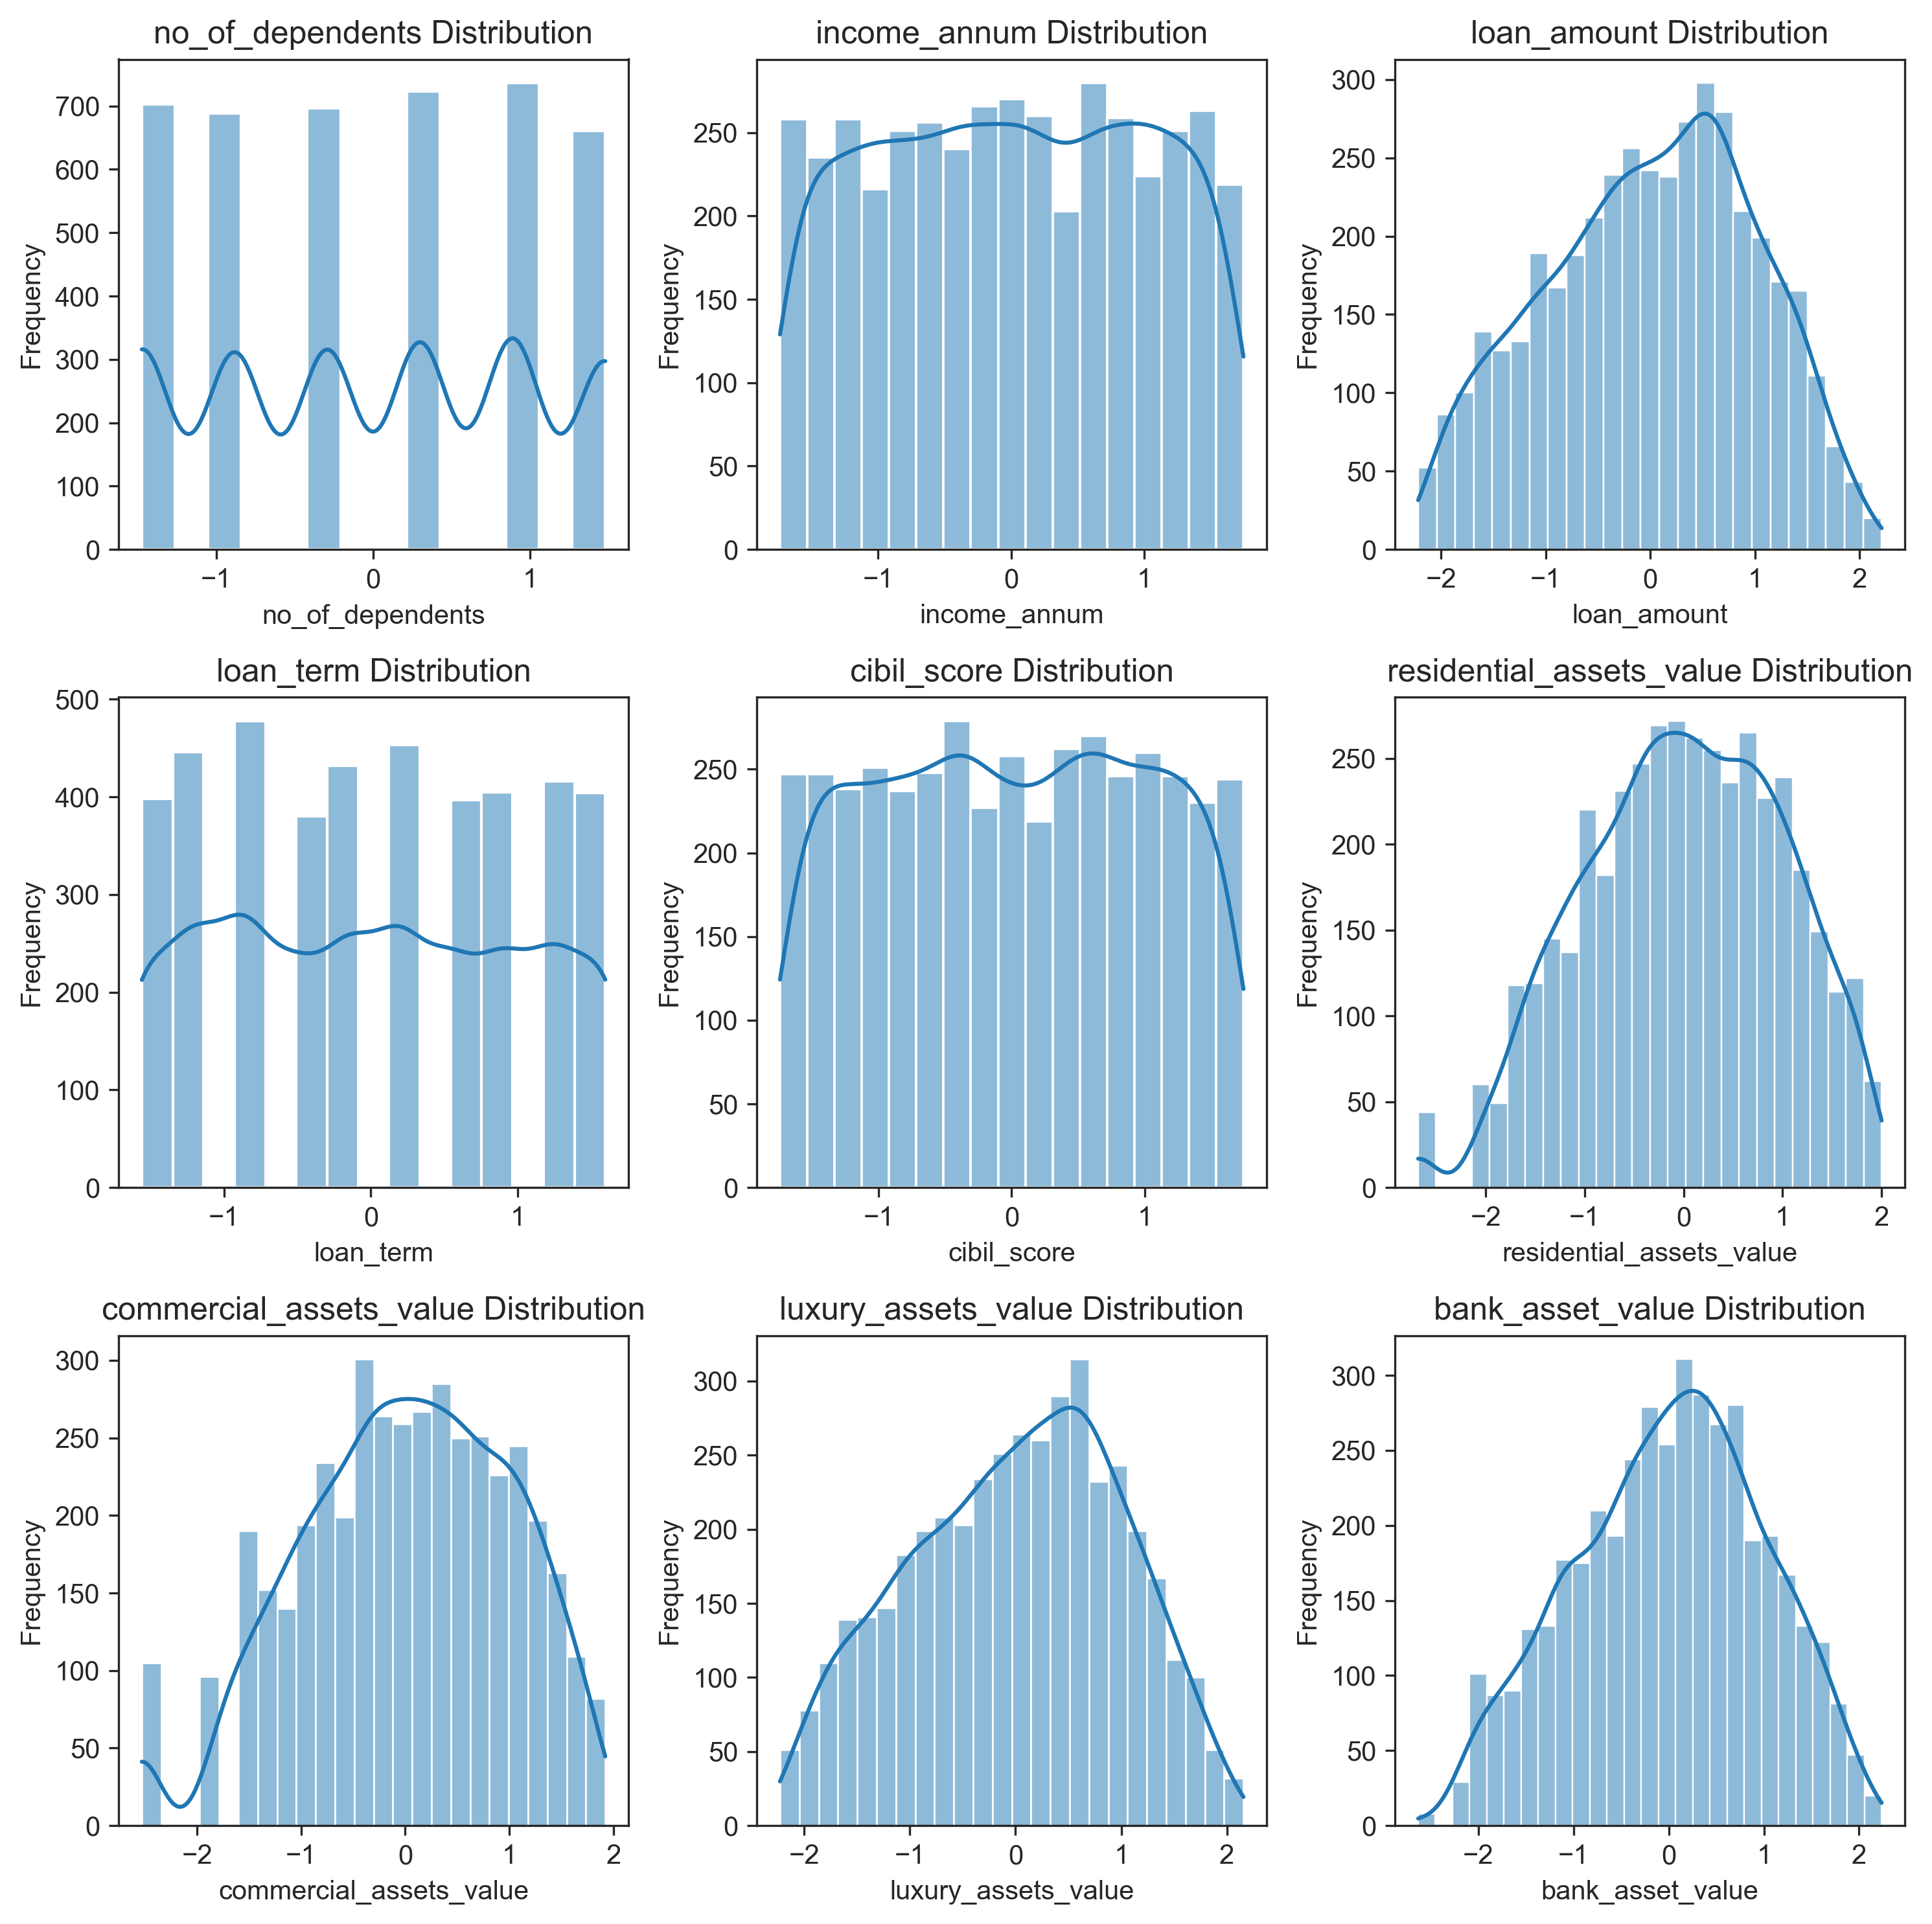

In [282]:
#Distribution plots for numerical features [skew-normalized]
fig= plt.figure(figsize=(10,10), dpi=300)
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3, i+1) #i+1 is the index of the subplot, from L to R, Up to Down
    sns.histplot(df[col], kde=True)
    plt.ylabel("Frequency")
    plt.title(f'{col} Distribution')

plt.savefig('images/01_DistributionsFixed.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

### Boxplots

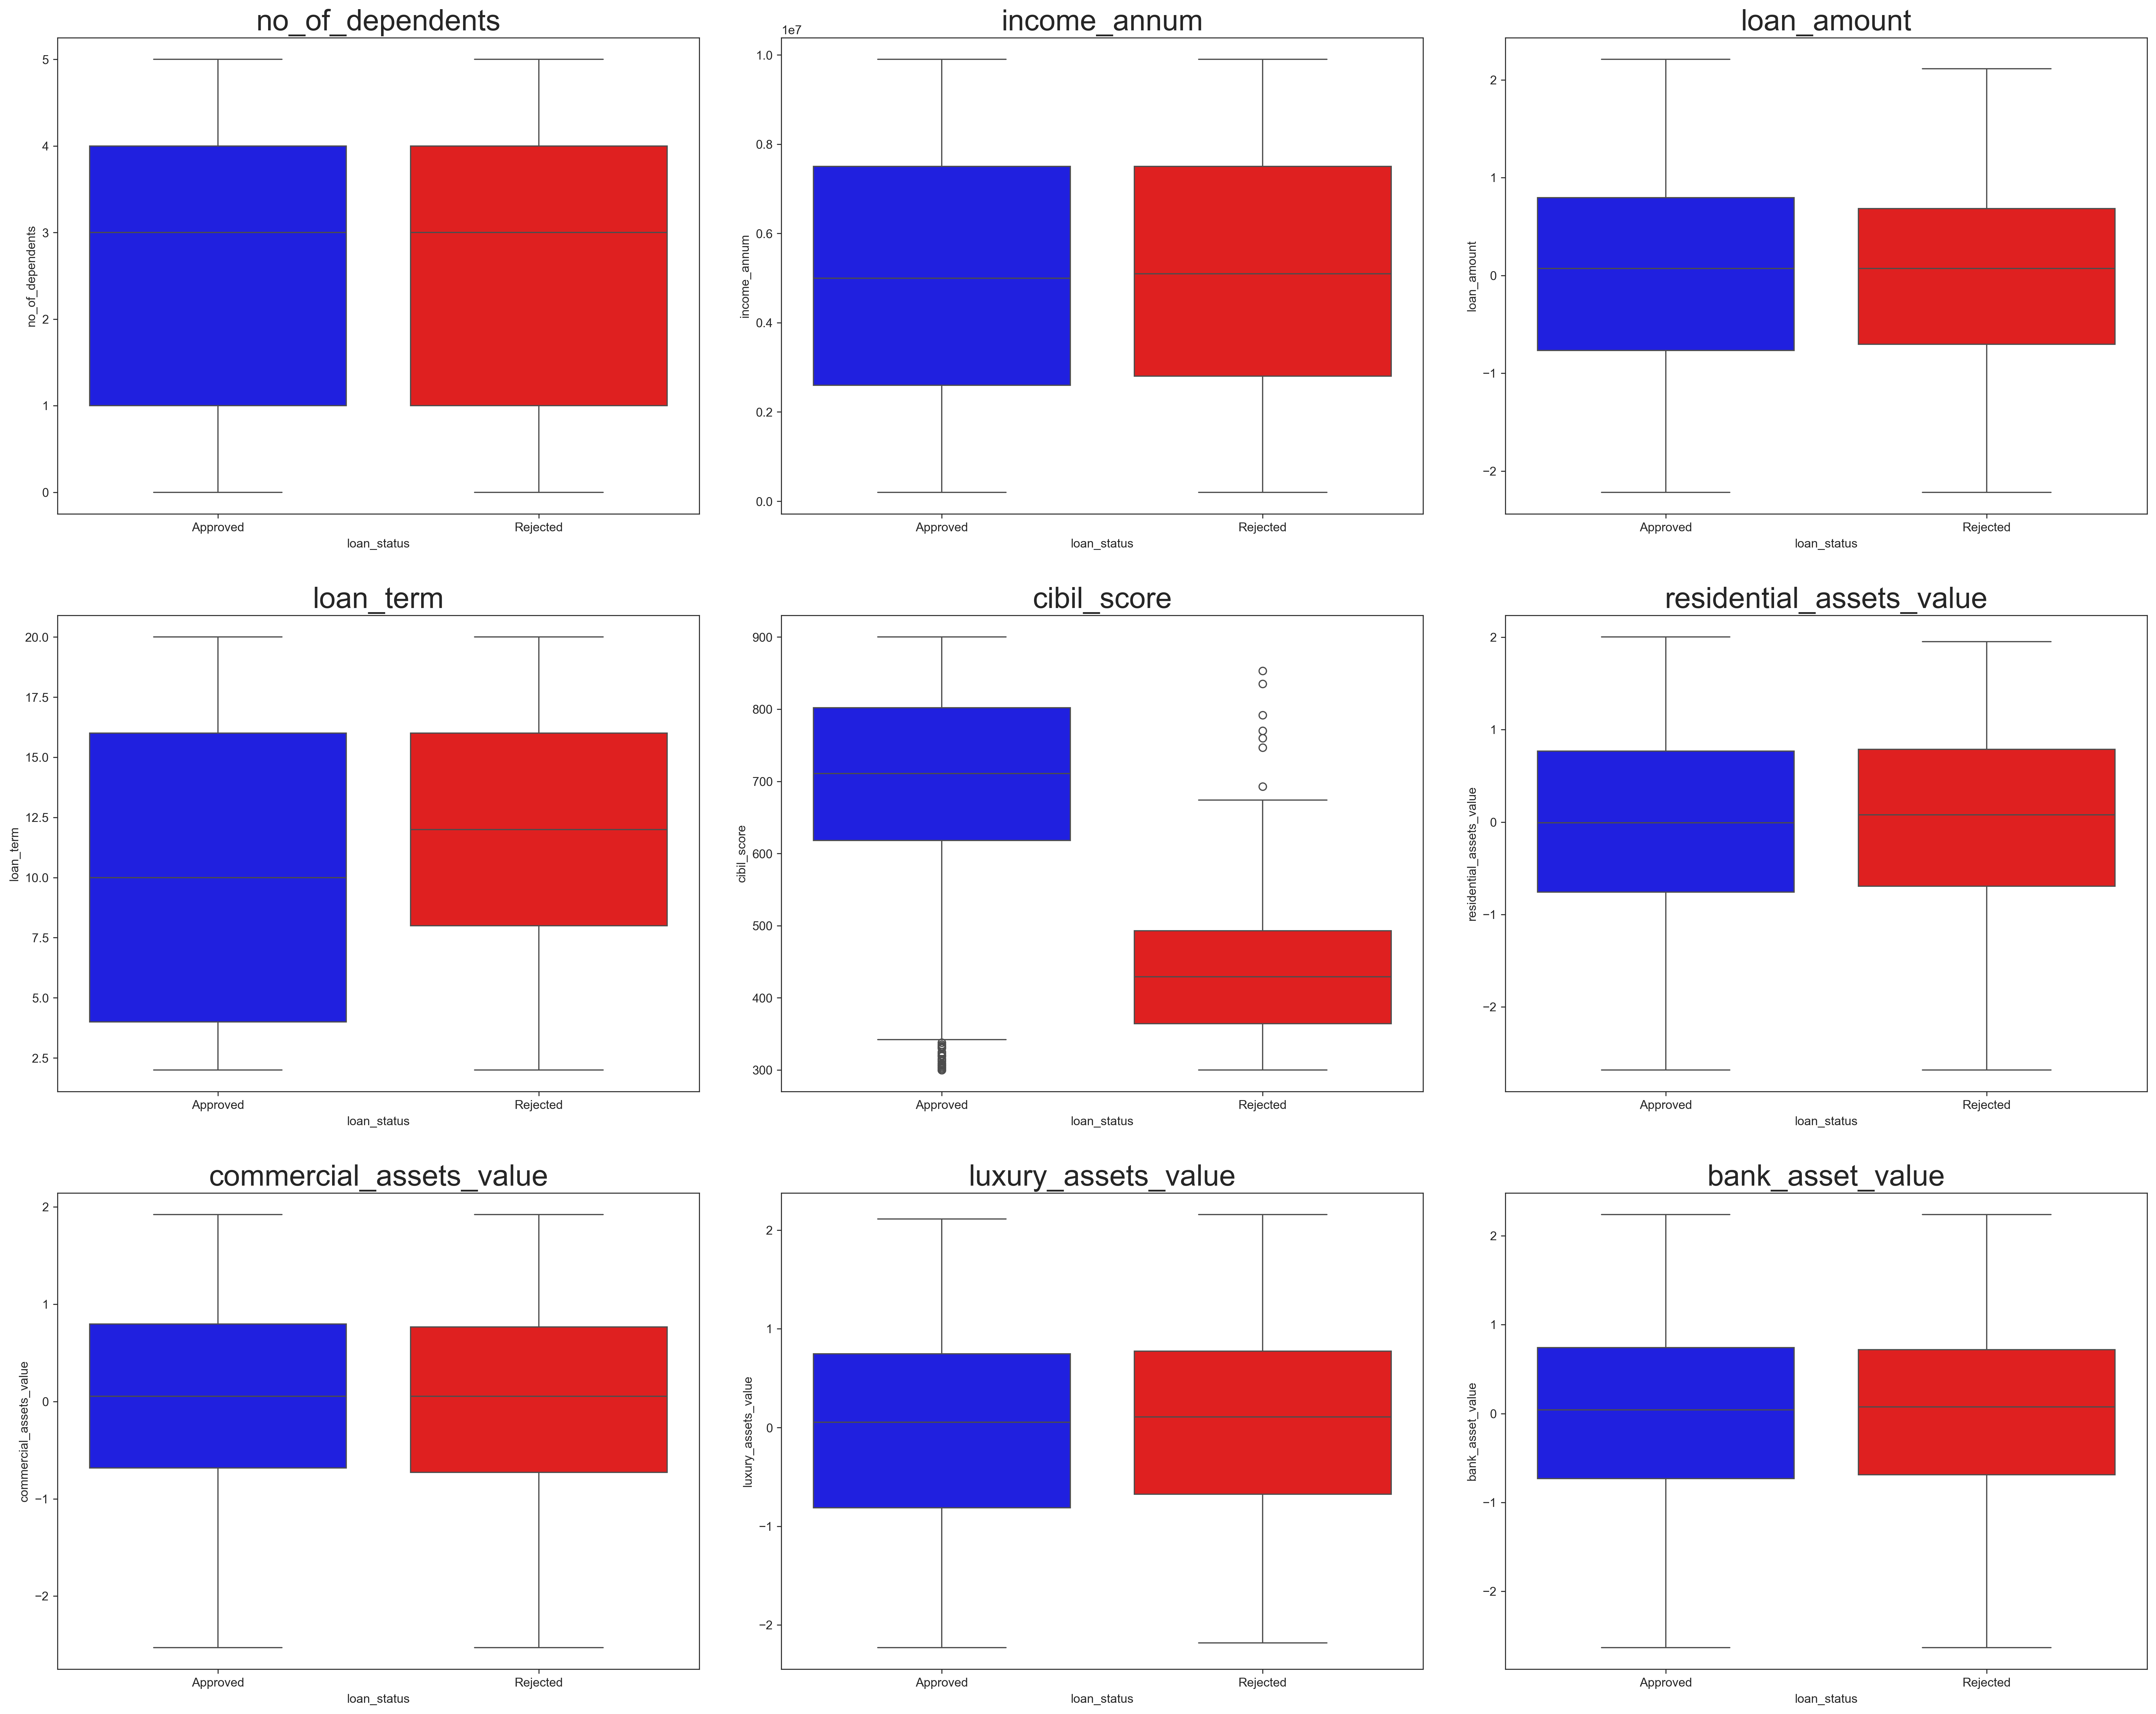

In [35]:
fig= plt.figure(figsize=(25,20), dpi=300)
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3, i+1) #i+1 is the index of the subplot, from L to R, Up to Down
    sns.boxplot(x='loan_status', y=col, data=df, hue='loan_status', palette=["b", "r"])
    plt.title(f'{col}', fontsize=24)

plt.savefig('images/01_BoxPlots.png', bbox_inches='tight')
plt.tight_layout(pad=3)
plt.show()

The boxplots above seem to indicate that people who with low CIBIL score tend to get their loan rejected. It also seems like the group who had their loan rejected opted for a longer loan term, indicating a slight inverse relationship between approval probability and loan terms. All these observations will be quantitatively evaluated through the ANOVA statistical test. 

### Countplots

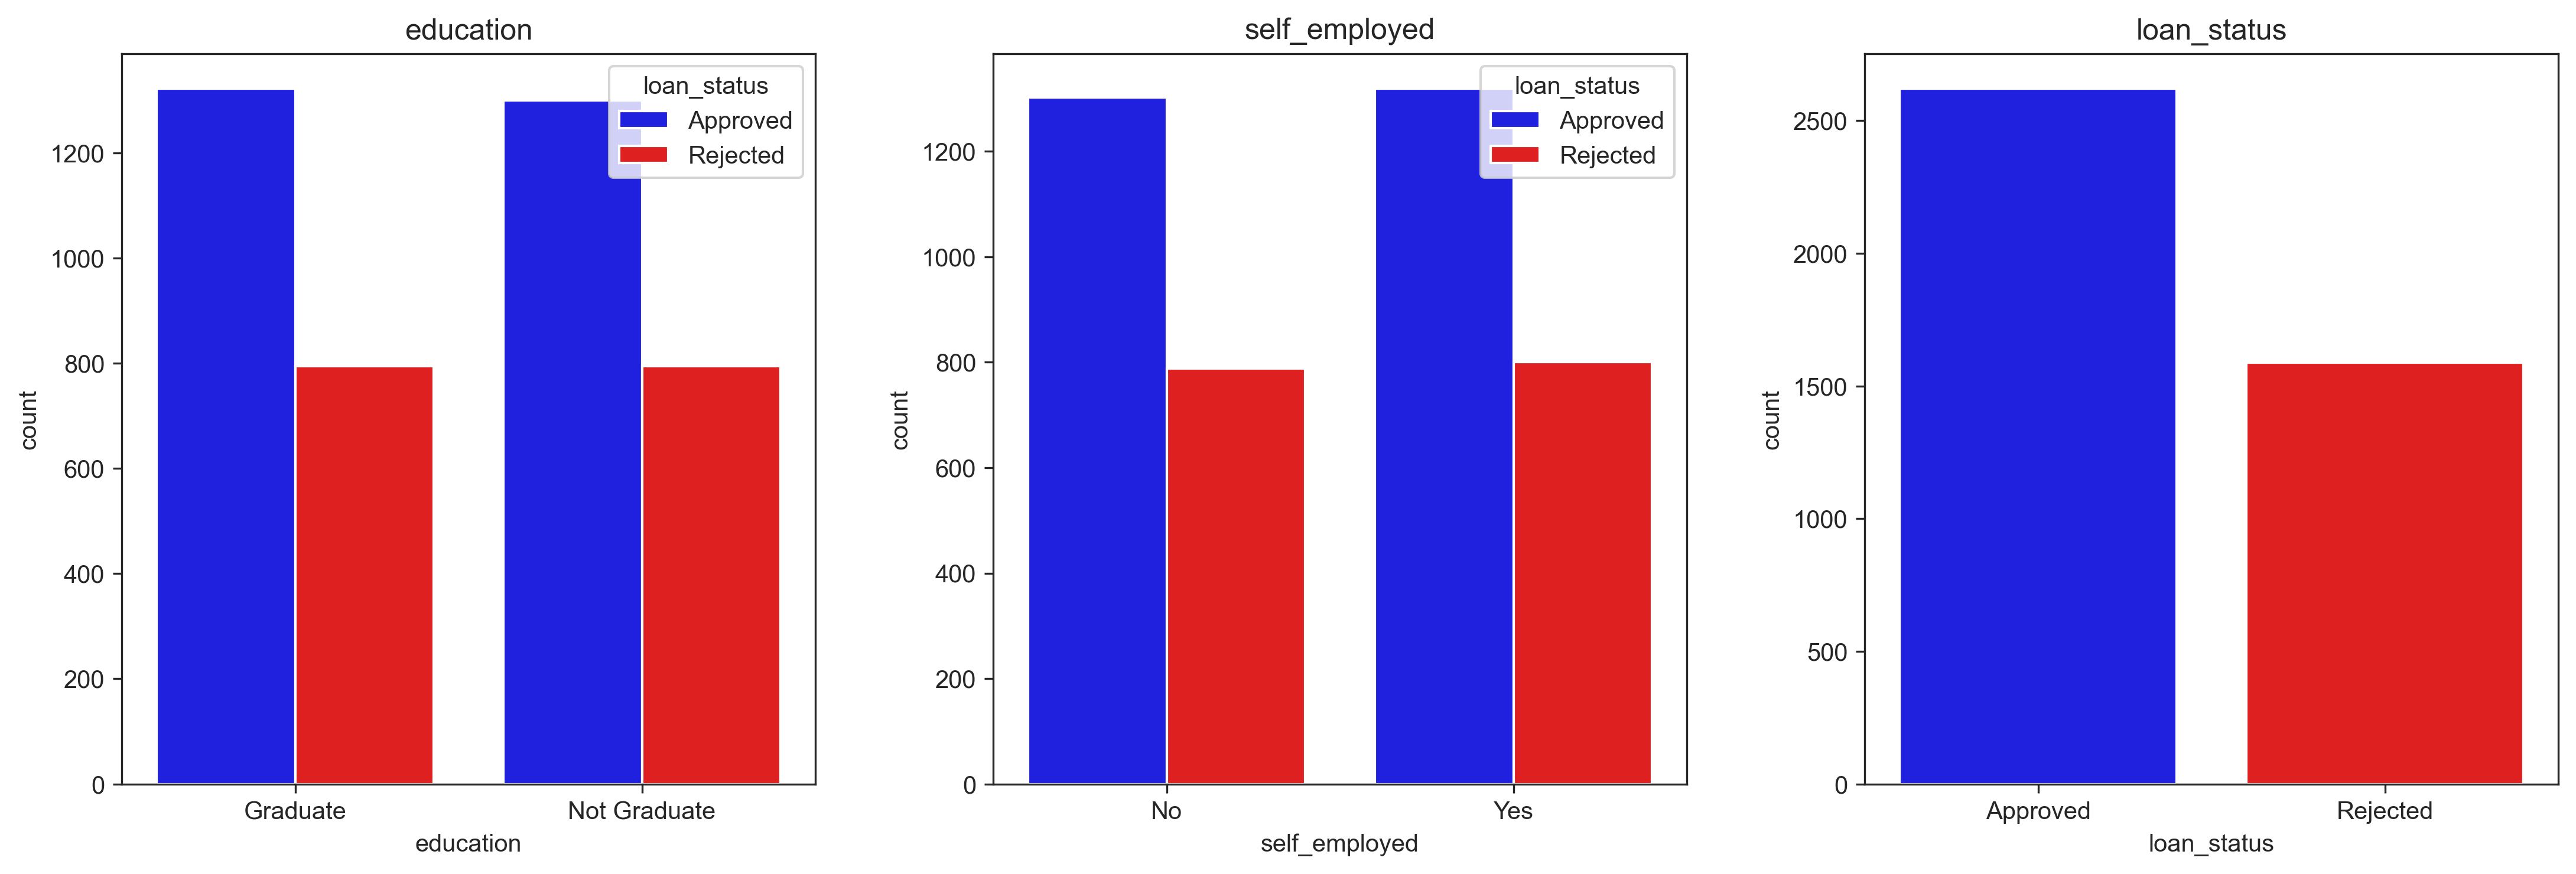

In [36]:
fig= plt.figure(figsize=(25,20), dpi=300)
for i, col in enumerate(categorical_cols):
    plt.subplot(4,5, i+1) #i+1 is the index of the subplot, from L to R, Up to Down
    sns.countplot(x=col, data=df, hue="loan_status", palette=["b", "r"])
    plt.title(f'{col}')

plt.savefig('images/01_CountPlots.png', bbox_inches='tight')
plt.tight_layout(pad=3)
plt.show()

The countplots above seem to indicate that the categories of education and self-employment have no overt predictive capability when it comes to loan approval probability. As was already stated, the majority of our data is target-positive (loans approved), meaning that this needs to be taken into account when training our model.

### Correlation Heatmap

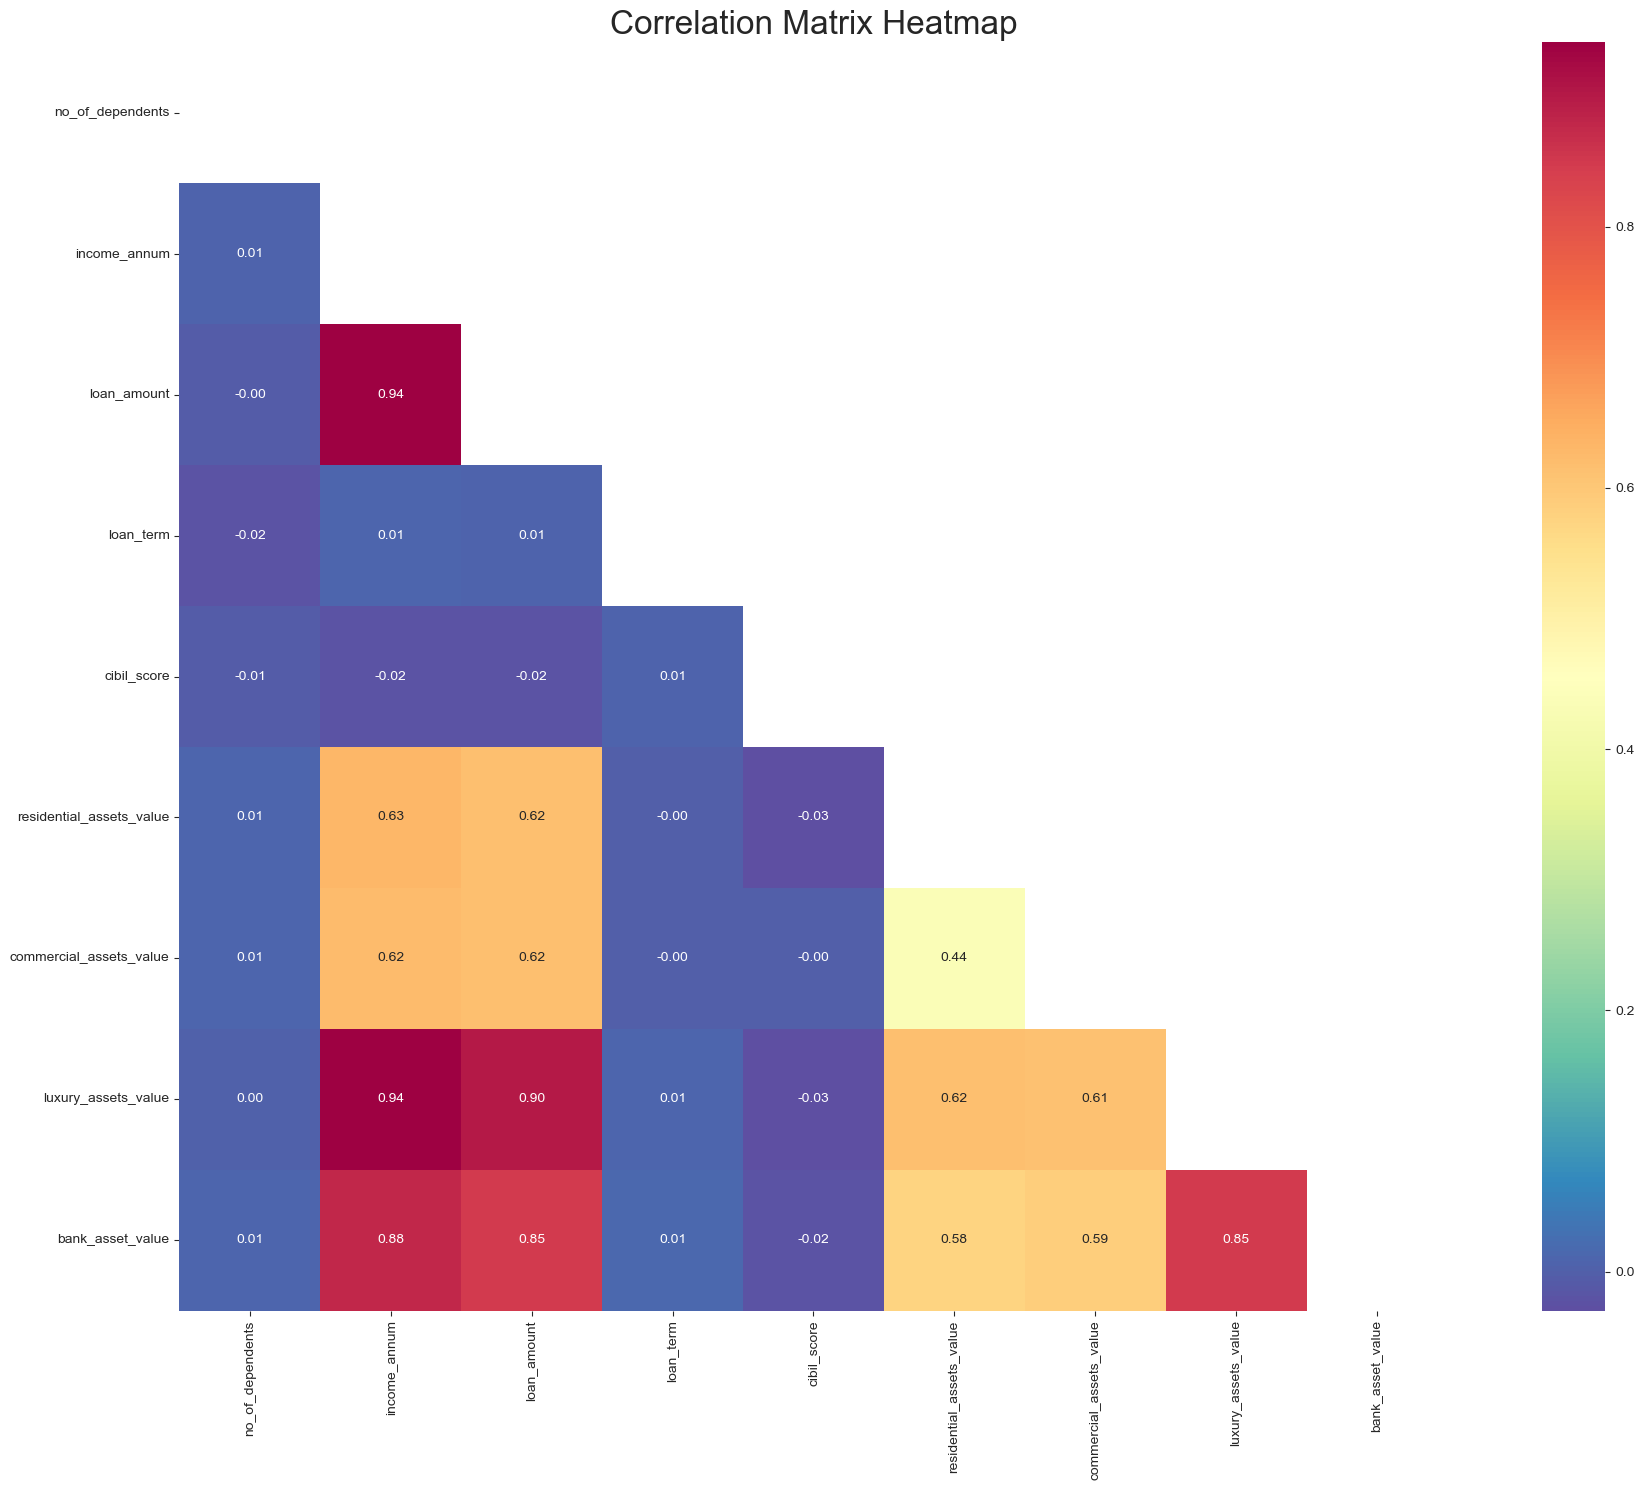

In [37]:
#Triangle Correlation Matrix in correlation heatmap form (for numerical columns)
mask = np.zeros_like(df[numerical_cols].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(20,15))
sns.heatmap(df[numerical_cols].corr(), mask= mask, square=True, annot=True, fmt='.2f', cmap ='Spectral_r', )
plt.title("Correlation Matrix Heatmap", fontsize=24)
plt.tight_layout()
plt.savefig('images/01_CorrHeatmap.png', bbox_inches='tight')
plt.show()

### ANOVA Statistical Test

In [38]:
#ANOVA test for checking statistical signifance in median difference of numerical categories for the `Approved` and `Rejected groups`.
print('---------------------------------------------------------------------------\nANOVA test for CIBIL score and loan term significance between Accepted and Rejected groups (95% confidence level)\n---------------------------------------------------------------------------')
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        unique_groups = df[cat_col].unique()
        if len(unique_groups) > 1:
            groups = [df[df[cat_col]==group][num_col] for group in unique_groups]
            f_stat, p_value = f_oneway(*groups)
            print(f'ANOVA for {num_col} grouped by {cat_col}:\n F-statistic = {f_stat}, p-value={p_value}, Statistical significance: {'Yes' if p_value < 0.05 else 'No'}')

---------------------------------------------------------------------------
ANOVA test for CIBIL score and loan term significance between Accepted and Rejected groups (95% confidence level)
---------------------------------------------------------------------------
ANOVA for no_of_dependents grouped by education:
 F-statistic = 0.11079430756265865, p-value=0.739258219309565, Statistical significance: No
ANOVA for no_of_dependents grouped by self_employed:
 F-statistic = 0.07259756140226163, p-value=0.7876048250111737, Statistical significance: No
ANOVA for no_of_dependents grouped by loan_status:
 F-statistic = 0.9512896114321409, p-value=0.3294473326592544, Statistical significance: No
ANOVA for income_annum grouped by education:
 F-statistic = 1.237565701086243, p-value=0.26600428211224597, Statistical significance: No
ANOVA for income_annum grouped by self_employed:
 F-statistic = 0.025326352052159294, p-value=0.873564202384641, Statistical significance: No
ANOVA for income_annum gr

The above results show that the only significant correlations are: a) between `loan_term` and `loan_status` and b) between `CIBIL score` and `loan_status`. Both confirm our suspicion about the impact of CIBIL score and chosen loan terms on loan approval.

# Machine Learning Models

## Data Pre-processing

In [39]:
#Standardizing all data
def standardize_data(df, num_col):
    scaler = StandardScaler()
    for col in df[num_col].columns:
        df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))
    return df

In [40]:
df = standardize_data(df, numerical_cols)

In [41]:
#Labeling categorical data
def label_cat_data(df, categorical_cols):
    labels = {}
    label_encoder = LabelEncoder()
    for col in df[categorical_cols].columns:
        df[col] = label_encoder.fit_transform(df[col])
        labels.update({col : label_encoder})
    return df

In [42]:
df = label_cat_data(df, categorical_cols)

In [43]:
df.tail()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
4265,1.477910,0,1,-1.450585,-1.635128,0.193902,-1.642887,-0.553680,-1.237397,-1.426722,-1.521255,1
4266,-1.472723,1,1,-0.624637,-0.286838,1.595595,-0.237480,-0.230667,-0.154379,-0.314015,-0.906883,0
4267,-0.292469,1,0,0.524507,0.974040,1.245172,-0.829841,-1.098412,1.392038,0.438781,0.789997,1
4268,-0.882596,1,0,-0.337351,-0.115045,-0.506944,1.045970,0.412380,-1.077351,0.033259,0.412051,0
4269,-0.882596,0,0,1.494097,1.461870,-0.156521,0.041279,1.369980,1.325556,1.904343,1.774628,0


In [44]:
#Creating feature matrices (dataframes)
X = df.drop(['loan_status'], axis='columns')
y = df['loan_status']

We now need to remember to split the train and test sets such that both receive an equal number of random y-positive samples. We accomplish this by setting `stratify=True`.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y) 

In [46]:
#Checking shapes and y-positive ratios between sets
print(f'X_train: {X_train.shape} | y_train: {y_train.shape} | number of y-positives: {y_train[y_train == 1].sum()}')
print(f'X_test: {X_test.shape} | y_test: {y_test.shape} | number of y-positives: {y_test[y_test == 1].sum()}')

X_train: (3367, 11) | y_train: (3367,) | number of y-positives: 1270
X_test: (842, 11) | y_test: (842,) | number of y-positives: 318


The `train_test_split` function is not managing to stratify the y-positive values because of a shortage of positive values. To fix the disproportion, but still have a good train/test ratio, we will simply remove 1270-318 random y-positive values from X_train.

In [47]:
removal_count = y_train[y_train == 1].sum()-y_test[y_test == 1].sum()
#Selecting random indices from y-positive y_train subset to remove rows
while i < (removal_count):
    random_index = np.random.randint(1,4269)
    if (random_index in y_train[y_train == 1].index):
        X_train.drop(index=random_index, inplace=True) 
        y_train.drop(index=random_index, inplace=True)
        i += 1

In [48]:
y_train[y_train == 1].sum()

320

In [49]:
y_test[y_test == 1].sum()

318

In [50]:
#Checking shapes and y-positive ratios between sets, again
print(f'X_train: {X_train.shape} | y_train: {y_train.shape} | number of y-positives: {y_train[y_train == 1].sum()}')
print(f'X_test: {X_test.shape} | y_test: {y_test.shape} | number of y-positives: {y_test[y_test == 1].sum()}')

X_train: (2417, 11) | y_train: (2417,) | number of y-positives: 320
X_test: (842, 11) | y_test: (842,) | number of y-positives: 318


Now our train and test sets have an approximately equal number of y-positive values.

## Model-Selection

For this dataset, we will be constructing a Neural Network Classifier using TensorFlow, optimizing it and comparing it to other Classifier models from ScikitLearn, namely the following:
- Logistic Regression
- SVC
- Linear SVC
- Random Forest Classifier
- Naive Bayes Classifier
- Bagging Classifier
- Decision Tree Classifier
- MLP Classifier
- XGB Regressor

In [266]:
#Tensorflow Neural Network
TF_model = Sequential([
        Dense(units=100, activation='relu', name='L1'),
        Dense(units=50, activation='relu', name='L2'),
        Dense(units=25, activation='relu', name='L3'),
        Dense(units=1, activation='linear', name='L4')
    ])

TF_model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
    )

#averaging accuracy over 10 training episodes
tf_scores = []
skf = StratifiedKFold(n_splits=10)
for train_index, cross_val_index in skf.split(X_train, y_train):
    X_cs_train = X_train.iloc[train_index]
    y_cs_train = y_train.iloc[train_index]

    X_cs_test = X_train.iloc[cross_val_index]
    y_cs_test = y_train.iloc[cross_val_index]

    TF_model.fit(X_cs_train, y_cs_train, epochs = 40)
    y_predict = TF_model.predict(X_cs_test)
    y_predict_logistic = tf.nn.sigmoid(y_predict).numpy()
    for i in range(len(y_predict_logistic)):
        y_predict_logistic[i] = 1 if y_predict_logistic[i] > 0.5 else 0
    current_score = accuracy_score(y_cs_test, y_predict_logistic)
    tf_scores.append(current_score)

Epoch 1/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3430
Epoch 2/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1166
Epoch 3/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0724
Epoch 4/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0844
Epoch 5/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0658
Epoch 6/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0593
Epoch 7/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0690
Epoch 8/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0710
Epoch 9/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0497
Epoch 10/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0410
Epoch 11/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0366
Epoch 12/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0434
Epoch 13/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0272
Epoch 14/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0510  
Epoch 15/40
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0351
Epoch 16/40
68/68

In [267]:
tf_scores = np.array(tf_scores)
TF_model_accuracy = tf_scores.mean()
TF_model_std = tf_scores.std()

In [268]:
TF_model_accuracy, TF_model_std

(0.9929717773738898, 0.004904735749784005)

The above accuracy result is a mean across 10 different Folds of the training data. It is the same as the built-in `cross_val_score` function in ScikitLear.

Let's first get a general feel for the performance of various Classificators on default parameter settings:

In [51]:
#Logistic Regression
logistic_model = LogisticRegression()
cross_val_score(logistic_model, X_train, y_train, cv=10).mean()

0.9408439353931621

In [52]:
#SVC
svc_model = SVC()
cross_val_score(svc_model, X_train, y_train, cv=10).mean()

0.9553290353554404

In [53]:
#Linear SVC
linear_svc_model = LinearSVC(dual=True)
cross_val_score(linear_svc_model, X_train, y_train, cv=10).mean()

0.940428997633826

In [54]:
#Random Forest Classifier
random_forest_model = RandomForestClassifier()
cross_val_score(random_forest_model, X_train, y_train, cv=10).mean()

0.9863464901752341

In [55]:
#Naive Bayes Classifier
gaussian_b_model = GaussianNB()
cross_val_score(gaussian_b_model, X_train, y_train, cv=10).mean()

0.9276087925654128

It's important to note that the Gaussian Naive Bayes Classifier assumes a Gaussian distribution of the features. We attempted to ensure this when skew-normalizing the data beforehand, and we did so relatively successfully.

In [56]:
#Bagging Classifier
bagging_model = BaggingClassifier()
cross_val_score(bagging_model, X_train, y_train, cv=10).mean()

0.9871780803127465

In [62]:
#Decision Tree Classifier
decision_tree__model = DecisionTreeClassifier()
cross_val_score(decision_tree__model, X_train, y_train, cv=10).mean()

0.9867631425534104

In [64]:
#MLP Classifier
MLP_model = MLPClassifier(max_iter=1000, verbose=True)
cross_val_score(MLP_model, X_train, y_train, cv=10).mean()

Iteration 1, loss = 0.80360416
Iteration 2, loss = 0.61467602
Iteration 3, loss = 0.49648149
Iteration 4, loss = 0.42811923
Iteration 5, loss = 0.38753033
Iteration 6, loss = 0.36101693
Iteration 7, loss = 0.34048167
Iteration 8, loss = 0.32208523
Iteration 9, loss = 0.30521758
Iteration 10, loss = 0.28912003
Iteration 11, loss = 0.27354797
Iteration 12, loss = 0.25902883
Iteration 13, loss = 0.24532068
Iteration 14, loss = 0.23265234
Iteration 15, loss = 0.22086644
Iteration 16, loss = 0.21017587
Iteration 17, loss = 0.20012724
Iteration 18, loss = 0.19121887
Iteration 19, loss = 0.18328195
Iteration 20, loss = 0.17599858
Iteration 21, loss = 0.16969461
Iteration 22, loss = 0.16399693
Iteration 23, loss = 0.15900994
Iteration 24, loss = 0.15431192
Iteration 25, loss = 0.14998660
Iteration 26, loss = 0.14625076
Iteration 27, loss = 0.14261047
Iteration 28, loss = 0.13962741
Iteration 29, loss = 0.13657423
Iteration 30, loss = 0.13413046
Iteration 31, loss = 0.13171767
Iteration 32, los

0.9813895271081238

In [65]:
#XGB Classifier
xgb_model = XGBClassifier()
cross_val_score(xgb_model, X_train, y_train, cv=10).mean()

0.9900706422962177

## Model-Evaluation

In [ ]:
def evaluate_models(X_train, y_train):
    models = {
        "Logistic Regression" : LogisticRegression(),
        "MLP Classifier" : MLPClassifier(max_iter=1000),
        "Decision Tree" : DecisionTreeClassifier(),
        "Random Forest" : RandomForestClassifier(),
        "XGBoost" : XGBClassifier(),
        "SVC" : SVC(),
        "LinearSVC" : LinearSVC(dual=True),
        "Bagging Classifier" : BaggingClassifier(),
        "Naive Bayes Gaussian" : GaussianNB(),
        
    }

    results = []
    for model_name, model in models.items():
        score = cross_val_score(model, X_train, y_train, cv=10)
        results.append({
            'Model' : model_name,
            'Cross Validation Score' : score.mean(),
            'Score STD' : score.std()
        })

    results_df = pd.DataFrame(results)

    return results_df

In [272]:
results_df = evaluate_models(X_train, y_train)
results_df.set_index('Model', inplace=True)

In [281]:
new_row = pd.DataFrame({'Model': ['TensorFlow NN'], 'Cross Validation Score':[TF_model_accuracy], 'Score STD':[TF_model_std]})
new_row.set_index('Model', inplace=True)
results_CV = pd.concat([results_df, new_row], axis='rows')
results_CV.sort_values(by='Cross Validation Score', ascending=False)

,Cross Validation Score,Score STD
Model,,
TensorFlow NN,0.992972,0.004905
XGBoost,0.990071,0.005298
Bagging Classifier,0.986765,0.007573
Decision Tree,0.986763,0.006074
Random Forest,0.984690,0.005567
MLP Classifier,0.978907,0.007481
SVC,0.955329,0.014160
Logistic Regression,0.940844,0.013557
LinearSVC,0.940429,0.012801


### Hyperparameter tuning

Hyperparameter tuning for the top 5 performing models. The TensorFlow Neural Network has already been tuned by trial end error upon construction. We tune the remaining SciKit Learn models using GridSearchCV.

In [283]:
models_opt = {
    'Bagging Classifier': {
        "model": BaggingClassifier(),
        'params': {
            'n_estimators': [5, 10, 20],
            'bootstrap': [True, False]
        }
    },
    'Decision Tree Classifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion':['gini', 'entropy', 'log_loss'],
            'splitter': ['best','random'],
            'max_depth': [3,5,10,20],
        }
    },
    'Random Forest Classifier':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators':[100, 200, 400],
            'criterion':['gini', 'entropy', 'log_loss'],
            'bootstrap': [True, False]
        }
    },
    'XGB':{
        'model': XGBClassifier(),
        'params': {
            "learning_rate": (0.005, 0.01, 0.15, 0.2),
            "max_depth": [3, 5, 10]
        }
    }
}

In [297]:
scores_opt = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=35)
def find_best_algorithm(models_opt, X_train, y_train):
    for model_name, config in models_opt.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, error_score='raise')
        gs.fit(X_train,y_train)
        scores_opt.append({
            'Model': model_name,
            'Best Score': gs.best_score_,
            'Best Parameters': gs.best_params_
        })
    return pd.DataFrame(scores_opt, columns=['Model', 'Best Score', 'Best Parameters']).sort_values(by='Best Score', ascending=False)

In [298]:
results_opt = find_best_algorithm(models_opt, X_train,y_train)

In [ ]:
pd.set_option('display.max_colwidth', 1000)
results_opt.set_index('Model', inplace=True)
results_opt

,Best Score,Best Parameters
Model,,
XGB,0.993388,"{'learning_rate': 0.2, 'max_depth': 3}"
Decision Tree Classifier,0.990909,"{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}"
Random Forest Classifier,0.990496,"{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 100}"
Bagging Classifier,0.989256,"{'bootstrap': True, 'n_estimators': 20}"


The tuned version of the XGBoost algorithm outperforms the TensorFlow Neural Network Classifier.

### Test Set Evaluation

In [311]:
def evaluate_test_set_models(X_test, y_test):
    models = {
        "Logistic Regression" : LogisticRegression(),
        "MLP Classifier" : MLPClassifier(max_iter=2000),
        "Decision Tree" : DecisionTreeClassifier(criterion='entropy', max_depth=10, splitter='best'),
        "Random Forest" : RandomForestClassifier(bootstrap=False, criterion='gini', n_estimators=100),
        "XGBoost" : XGBClassifier(learning_rate=0.2, max_depth=3),
        "SVC" : SVC(max_iter=2000),
        "LinearSVC" : LinearSVC(dual=True, max_iter=2000),
        "Bagging Classifier" : BaggingClassifier(bootstrap=True, n_estimators=20),
        "Naive Bayes Gaussian" : GaussianNB(),     
    }

    results = []
    for model_name, model in models.items():
        score = cross_val_score(model, X_test, y_test, cv=10)
        results.append({
            'Model' : model_name,
            'Test Set Score' : score.mean(),
            'Score STD' : score.std()
        })

    results_df = pd.DataFrame(results)

    return results_df

In [315]:
results_test_set = evaluate_test_set_models(X_test, y_test)
results_test_set.set_index('Model', inplace=True)

In [321]:
#Running TensorFlow Neural Network on test set
TF_model.fit(X_train, y_train, epochs = 40)
y_predict = TF_model.predict(X_test)
y_predict_logistic_test = tf.nn.sigmoid(y_predict).numpy()

for i in range(len(y_predict_logistic_test)):
    y_predict_logistic_test[i] = 1 if y_predict_logistic_test[i] > 0.5 else 0
tf_nn_test_score_raw = accuracy_score(y_test, y_predict_logistic_test)
tf_score_test = np.array(tf_nn_test_score_raw)

tf_acc_test = tf_score_test.mean()
tf_std_test = tf_score_test.std()

new_row_test = pd.DataFrame({'Model': ['TensorFlow NN'], 'Test Set Score':[tf_acc_test], 'Score STD':[tf_std_test ]})
new_row_test.set_index('Model', inplace=True)
results_test_final = pd.concat([results_test_set, new_row_test], axis='rows')
results_test_final.sort_values(by='Test Set Score', ascending=False)

Epoch 1/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0083    
Epoch 2/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030   
Epoch 3/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5464e-04
Epoch 4/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.4932e-04
Epoch 5/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2855e-04
Epoch 6/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2447e-04
Epoch 7/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.1654e-05
Epoch 8/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9619e-04
Epoch 9/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3201e-05
Epoch 10/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3451e-04
Epoch 11/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5076e-05
Epoch 12/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4366e-05
Epoch 13/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 4.2054e-04
Epoch 14/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063  
Epoch 15/40
76/76 ━━━━━━━━━━━━

,Test Set Score,Score STD
Model,,
Random Forest,0.967941,0.019201
XGBoost,0.964398,0.014949
Decision Tree,0.957227,0.024484
Bagging Classifier,0.954888,0.025854
TensorFlow NN,0.944181,0.000000
MLP Classifier,0.931106,0.023712
SVC,0.907409,0.030294
Naive Bayes Gaussian,0.907367,0.018192
LinearSVC,0.882451,0.032856


# Conclusions

### Feature Importance

<Figure size 1500x500 with 0 Axes>

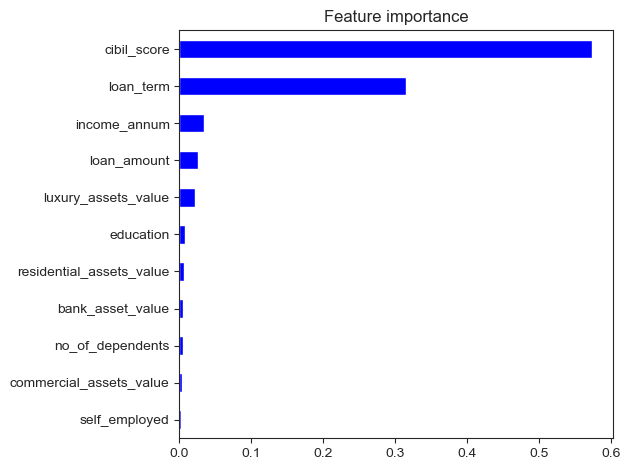

In [327]:
xgb_model.fit(X_train, y_train)

#Plotting feature importance
feature_df = pd.DataFrame(data=xgb_model.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)
fig = plt.figure(figsize=(15,5))
feature_df.plot(kind='barh', color='b').invert_yaxis()
plt.title('Feature importance')
plt.legend().remove()

plt.tight_layout()
plt.savefig('images/01_FeatureImportance.png', bbox_inches='tight')
plt.show()

### Final words

We can conclude that:
- A good portion of the data is substantially skewed
- The overall best performing ML models for predicting Loan Approval (based on test set results) are the Random Forest, XGBoost and Decision Tree algorithms. The best accuracy achieved thus far is 0.967941.
- The most important indicators of whether an applicant will get his loan approved are his CIBIL score, the loan term, and the applicant's annual income